In [1]:
#plot dephasing N = 3

In [6]:
import numpy as np
import sys
sys.path.insert(1,'../')

import matplotlib.pyplot as plt

In [7]:
import csv
from numpy import *
f2 = open('../../experiments/squeezing_ansatz/dephasing_N3.txt', 'r') 
lines = f2.readlines()

noise, cost, cls, sld, traceoff, ce = [], [], [], [], [], []
cost_std, cls_std, sld_std, traceoff_std, ce_std = [], [], [], [], []

for line in lines:
    p = line.split()
    noise.append(float(p[0]))
    cost.append(float(p[1]))
    cls.append(float(p[2]))
    sld.append(float(p[3]))
    traceoff.append(float(p[4]))
    ce.append(float(p[5]))
    
    cost_std.append(float(p[6]))
    cls_std.append(float(p[7]))
    sld_std.append(float(p[8]))
    traceoff_std.append(float(p[9]))
    ce_std.append(float(p[10]))
    
f2.close() 

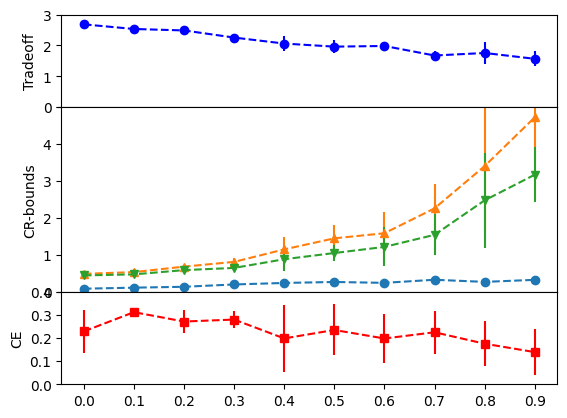

In [8]:
# Simple data to display in various forms
from matplotlib import gridspec

fig = plt.figure()
# set height ratios for subplots
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 2, 1]) 

# the first subplot
ax0 = plt.subplot(gs[0])
line0 = ax0.errorbar(noise, traceoff, traceoff_std, fmt='--o', color='blue')

#set up 
#ax0.grid(True, linestyle='-', color='0.85') #grid
plt.xticks(np.arange(0,1.0,0.1))
plt.yticks(np.arange(0,3.01,1))
plt.ylabel('Tradeoff')


# the second subplot
ax1 = plt.subplot(gs[1], sharex = ax0)
line1 = ax1.errorbar(noise, cost, cost_std, fmt='--o')
line2 = ax1.errorbar(noise, cls, cls_std, fmt='--^')
line3 = ax1.errorbar(noise, sld, sld_std, fmt='--v')

#setup
plt.gca().set_ylim(0,5)
#plt.grid(True, linestyle='-', color='0.85')
plt.xticks(np.arange(0,1.0,0.1))
plt.yticks(np.arange(0,5.01,1))
plt.ylabel('CR-bounds')    

#the third subplot
ax2 = plt.subplot(gs[2], sharex = ax0)
line4 = ax2.errorbar(noise, ce, ce_std, fmt='--s', color='red')

x = np.linspace(0, 1, 10)
y = np.full(100, 3)


plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

#setup
#plt.grid(True, linestyle='-', color='0.85')
plt.xticks(np.arange(0,1.0,0.1))
plt.yticks(np.arange(0,0.401,0.1))
plt.ylabel('CE')


# put legend on first subplot
#ax0.legend((line0), ('T'), loc='lower left')
#ax1.legend((line1, line2, line3), ('loss','cls','sld' ), loc='upper left')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)

plt.savefig('fig_noise_squeez.eps')
plt.show()

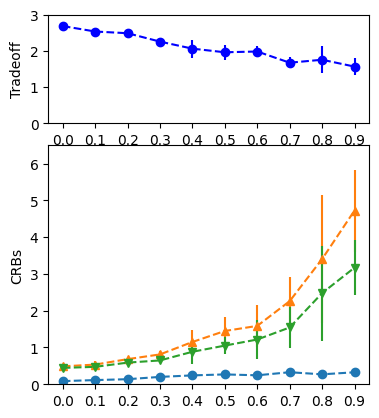

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure()

# 1.
gs = GridSpec(3, 3)  # グリッド

# 2.
ss1 = gs.new_subplotspec((0, 0), colspan=2)  # ax1 を配置する領域
ss2 = gs.new_subplotspec((1, 0), rowspan=2, colspan=2)  # ax2 を配置する領域


ax1 = plt.subplot(ss1)
line1 = ax1.errorbar(noise, traceoff, traceoff_std, fmt='--o', color='blue')
plt.xticks(np.arange(0,1.0,0.1))
plt.yticks(np.arange(0,3.01,1))
plt.ylabel('Tradeoff')

# the second subplot
ax2 = plt.subplot(ss2, sharex = ax0)
line1 = ax2.errorbar(noise, cost, cost_std, fmt='--o')
line2 = ax2.errorbar(noise, cls, cls_std, fmt='--^')
line3 = ax2.errorbar(noise, sld, sld_std, fmt='--v')
ax2.set_ylim(0,6.5)

#setup

#plt.grid(True, linestyle='-', color='0.85')
plt.xticks(np.arange(0,1.0,0.1))
plt.yticks(np.arange(0,6.01,1))
plt.ylabel('CRBs')  

plt.savefig('fig_noise_squeezing_2.eps')
plt.show()

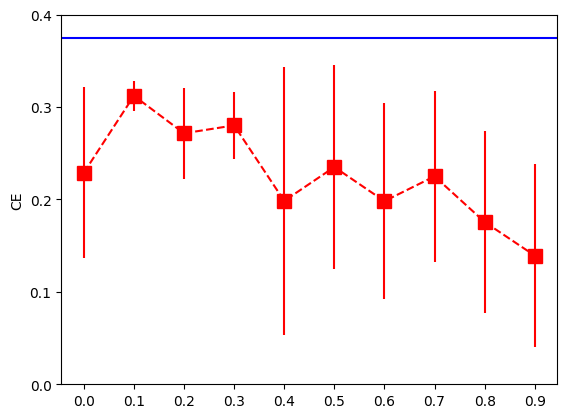

In [11]:
#the third subplot
import matplotlib.pyplot as plt
plt.errorbar(noise, ce, ce_std, fmt='--s', color='red', markersize=10)
plt.axhline(y = (0.5-1./2**3), color = 'b', linestyle = '-')

plt.xticks(np.arange(0,1.0,0.1))
plt.yticks(np.arange(0,0.401,0.1))
plt.ylabel('CE')

plt.savefig('fig_CE_squeezing_2.eps')
plt.show()